In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
al=pd.read_csv(r"D:\data set\Alcohol_Sales.csv",index_col='DATE',parse_dates=True)

In [3]:
al.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
al.shape

(325, 1)

In [5]:
al=al.rename({'S4248SM144NCEN':'Sales'},axis=1)

In [6]:
#al.isnull().sum()

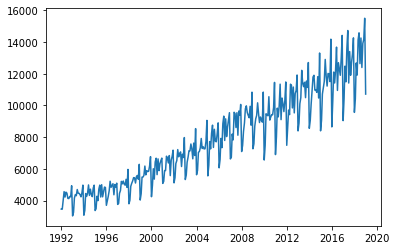

In [31]:
plt.plot(al.Sales)

In [32]:
al_log=np.log(al)

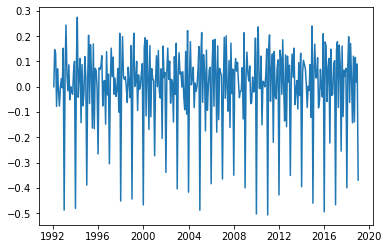

In [34]:
plt.plot(al_log.diff())

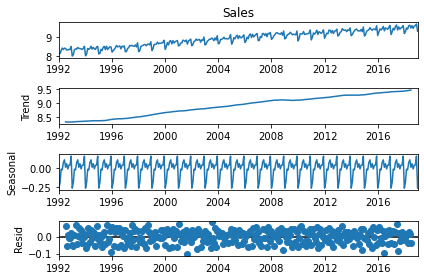

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
al_seasonal=seasonal_decompose(al_log['Sales'])
al_seasonal.plot();

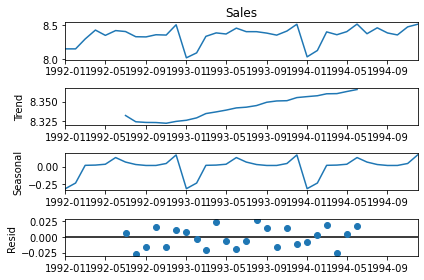

In [36]:
al_seasonal=seasonal_decompose(al_log.Sales[0:36])
al_seasonal.plot();

In [37]:
al.shape

(325, 1)

In [38]:
train_al=al.iloc[0:312]
test_al=al.iloc[312:324]

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal  import seasonal_decompose
import pmdarima
from pmdarima import  auto_arima


In [40]:
auto_arima(al_log['Sales'],seasonal=True,m=12)

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True)

In [42]:
model=SARIMAX(al_log['Sales'],seasonal_order=(2,0,2,12),order=(3,1,0))

C:\Users\Priti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Priti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [43]:
result=model.fit()

C:\Users\Priti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
pred_al=result.predict(start=312,end=323)
pred_al=np.exp(pred_al)
pred_al

2018-01-01     9642.452352
2018-02-01    10706.639379
2018-03-01    12137.713195
2018-04-01    12156.228857
2018-05-01    13590.885220
2018-06-01    14471.032951
2018-07-01    12513.508952
2018-08-01    13889.180272
2018-09-01    12826.183194
2018-10-01    13586.223017
2018-11-01    13760.245292
2018-12-01    15078.626273
Freq: MS, Name: predicted_mean, dtype: float64

In [46]:
from sklearn.metrics import *

In [47]:
mean_squared_error(test_al.Sales,pred_al)

129384.76388658649

In [48]:
rmse=np.sqrt(mean_squared_error(test_al.Sales,pred_al))
rmse

359.7009367329845

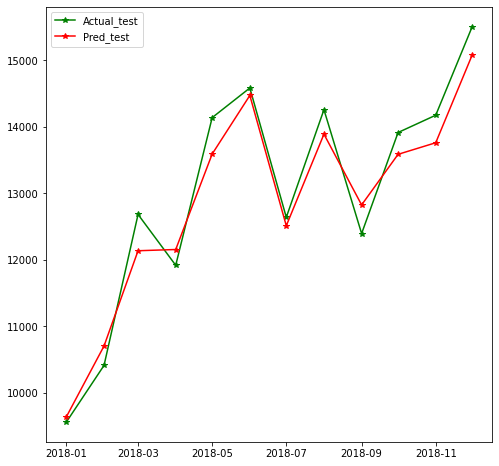

In [49]:
plt.figure(figsize=(8,8))
plt.plot(test_al.Sales,marker="*",color='g',label='Actual_test')
plt.plot(pred_al,marker="*",color='r',label='Pred_test')
plt.legend()
#from graph i can see that predicted values are very less than acutal values  for hoildays that mean my model not working for holidays. so I have to use SARIMAX model

In [59]:
next24=result.predict(start=325,end=348)      #predicted values
next24=np.exp(next24)
next24

2019-02-01    11557.708952
2019-03-01    13477.535526
2019-04-01    13654.352726
2019-05-01    14833.839402
2019-06-01    15658.592964
2019-07-01    13806.093991
2019-08-01    14705.546248
2019-09-01    13853.447524
2019-10-01    14731.773294
2019-11-01    14695.312853
2019-12-01    16792.090898
2020-01-01    11071.738206
2020-02-01    12041.621328
2020-03-01    14279.733767
2020-04-01    14075.593408
2020-05-01    15627.330335
2020-06-01    16576.639784
2020-07-01    14498.526316
2020-08-01    15538.489381
2020-09-01    14589.747534
2020-10-01    15362.504882
2020-11-01    15435.575759
2020-12-01    17510.285730
2021-01-01    11510.402852
Freq: MS, Name: predicted_mean, dtype: float64

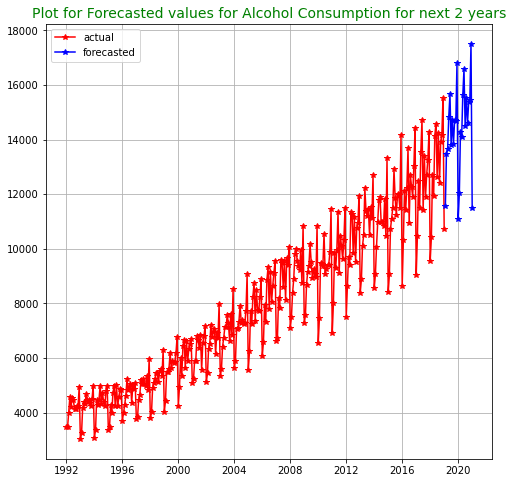

In [60]:
plt.figure(figsize=(8,8))
plt.plot(al,marker="*",color='r',label='actual')
plt.plot(next24,color='b',marker="*",label='forecasted')
plt.title('Plot for Forecasted values for Alcohol Consumption for next 2 years',color='g',size=14)
plt.legend()
plt.grid()


In [58]:
al

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
